# <font color='blue'>Data Science Academy</font>

## <font color='blue'>Fundamentos de Linguagem Python Para Análise de Dados e Data Science</font>

## <font color='blue'>Projeto 2</font>

## <font color='blue'>Análise Exploratória de Dados em Linguagem Python Para a Área de Varejo</font>

![DSA](imagens/projeto2.png)

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Carregando os Dados

In [3]:
# Carrega o dataset
df_dsa = pd.read_csv('dados/dataset.csv')

In [4]:
# Shape
df_dsa.shape

(9700, 11)

In [5]:
# Amostra dos dados
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [6]:
# Amostra dos dados
df_dsa.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

In [7]:
# Colunas do conjunto de dados
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [8]:
# Verificando o tipo de dado de cada coluna
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [9]:
# Resumo estatístico da coluna com o valor de venda
df_dsa['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [10]:
# Verificando se há registros duplicados
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [11]:
# Verificando de há valores ausentes
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [12]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [13]:
df_dsa['Valor_Venda'].max()

22638.48

In [14]:
df_q1 = df_dsa[(df_dsa.Categoria == 'Office Supplies')]

In [15]:
df_q1Agrp = df_q1.groupby('Cidade')['Valor_Venda'].sum()

In [16]:
cidade_maior_venda = df_q1Agrp.idxmax()

In [17]:
cidade_maior_venda

'New York City'

## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

In [18]:
df_dsaq2 = df_dsa.groupby('Data_Pedido')['Valor_Venda'].sum()

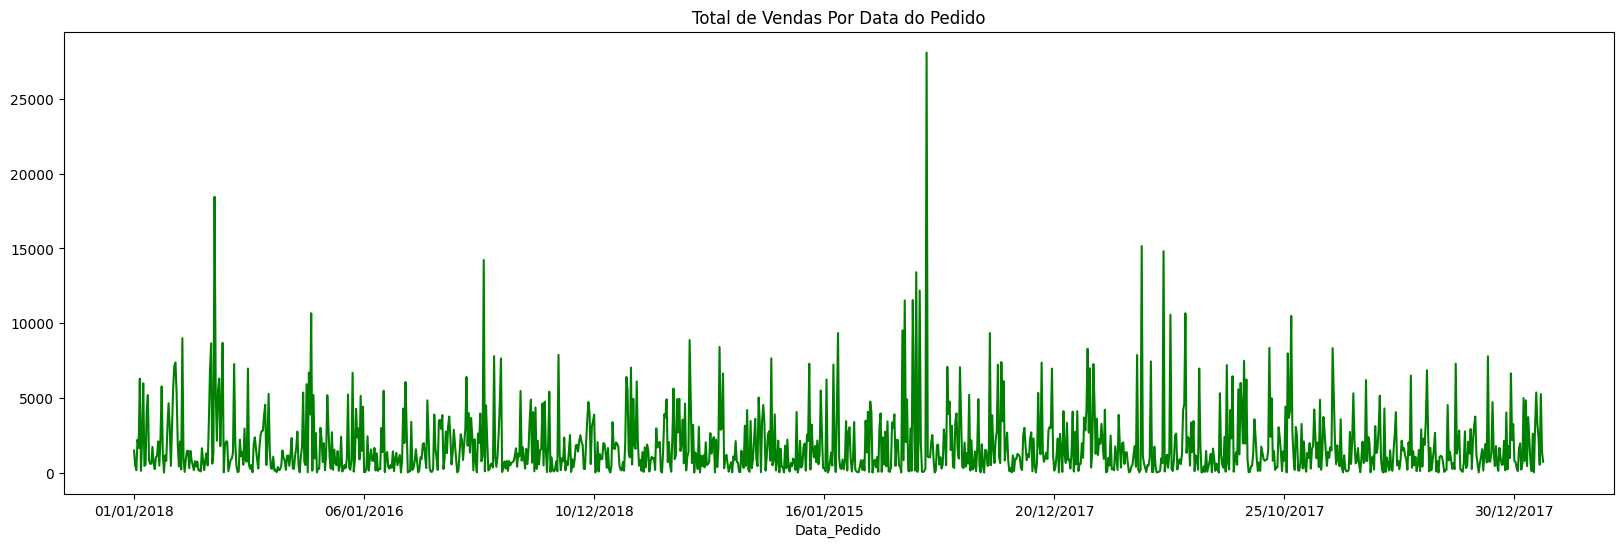

In [19]:
plt.figure(figsize=(20,6))
df_dsaq2.plot(x = 'Data_Pedido', y = 'Valor_Venda', color='green')
plt.title('Total de Vendas Por Data do Pedido')
plt.show()

## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

In [20]:
df_dsaq3 = df_dsa.groupby('Estado')['Valor_Venda'].sum()
df_dsaq3

Estado
Alabama                  19510.6400
Arizona                  35272.6570
Arkansas                 11673.8300
California              442927.0975
Colorado                 31841.5980
Connecticut              13366.7370
Delaware                 26452.5890
District of Columbia      2865.0200
Florida                  88043.7000
Georgia                  48083.1600
Idaho                     4292.5160
Illinois                 78109.9270
Indiana                  48718.4000
Iowa                      4443.5600
Kansas                    2914.3100
Kentucky                 36409.5800
Louisiana                 9131.0500
Maine                     1270.5300
Maryland                 23705.5230
Massachusetts            27363.2640
Michigan                 76081.1740
Minnesota                29863.1500
Mississippi              10771.3400
Missouri                 22205.1500
Montana                   5589.3520
Nebraska                  7194.9500
Nevada                   16729.1020
New Hampshire        

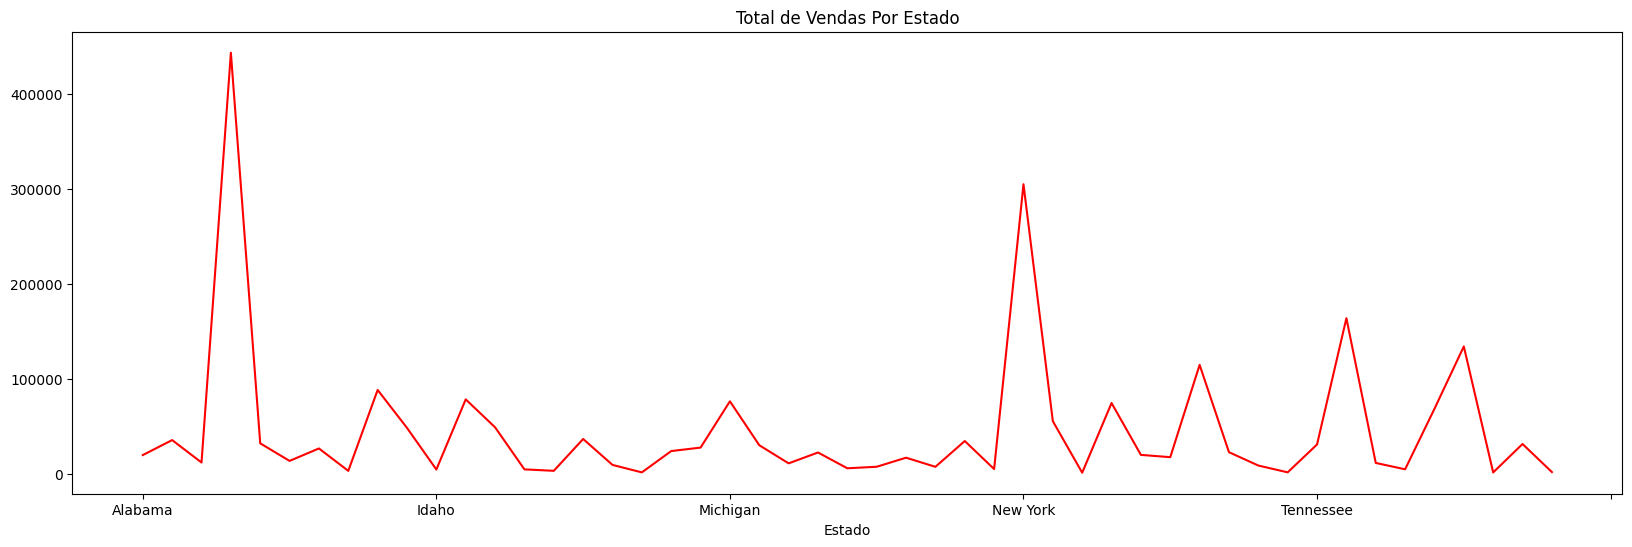

In [21]:
plt.figure(figsize=(20,6))
df_dsaq3.plot(x = 'Estado', y = 'Valor_Venda', color='red')
plt.title('Total de Vendas Por Estado')
plt.show()

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

In [22]:
df_dsaq4 = df_dsa.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda', ascending= False).head(10)

In [23]:
df_dsaq4

,Cidade,Valor_Venda
327,New York City,251749.2190
265,Los Angeles,171654.6330
450,Seattle,114725.4780
436,San Francisco,107489.9520
372,Philadelphia,107197.8030
207,Houston,61590.1868
435,San Diego,47458.3790
80,Chicago,46974.3430
216,Jacksonville,44713.1830
123,Detroit,42446.9440


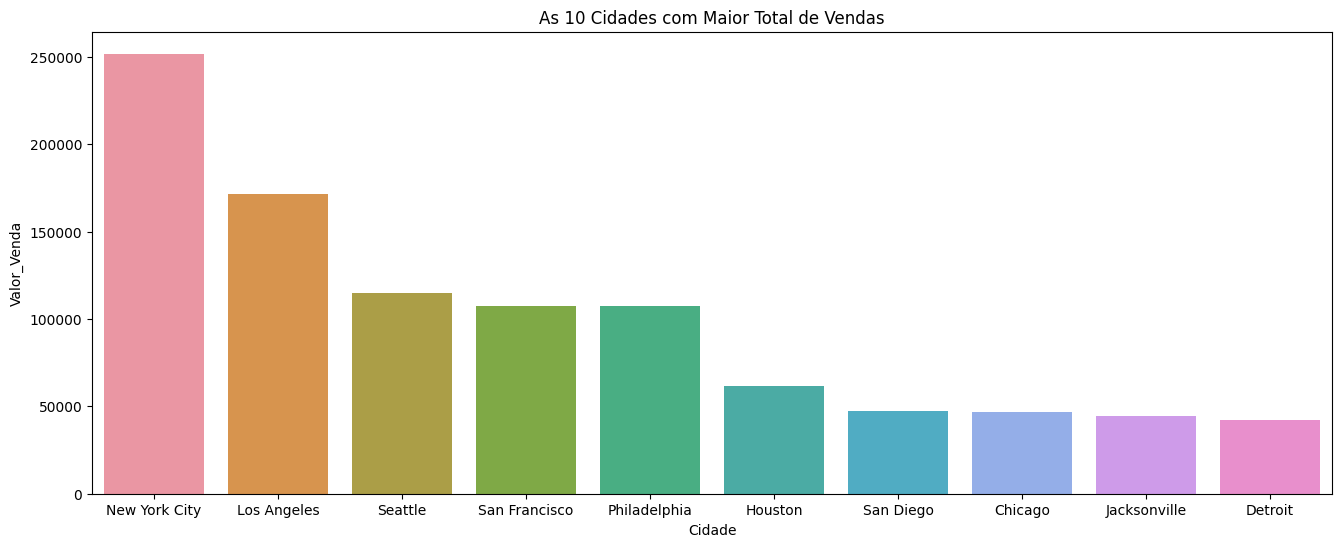

In [24]:
plt.figure(figsize = (16, 6))
sns.set_palette('coolwarm')
sns.barplot(data = df_dsaq4, 
            y = 'Valor_Venda', 
            x = 'Cidade').set(title = 'As 10 Cidades com Maior Total de Vendas')
plt.show()

## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

In [25]:
df_dsaq5 = df_dsa.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda', ascending= False).head()
df_dsaq5

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [26]:
# Função para converter os dados em valor absoluto
def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct * total / 100.0))
        return ' $ {v:d}'.format(v = val)
    return my_format

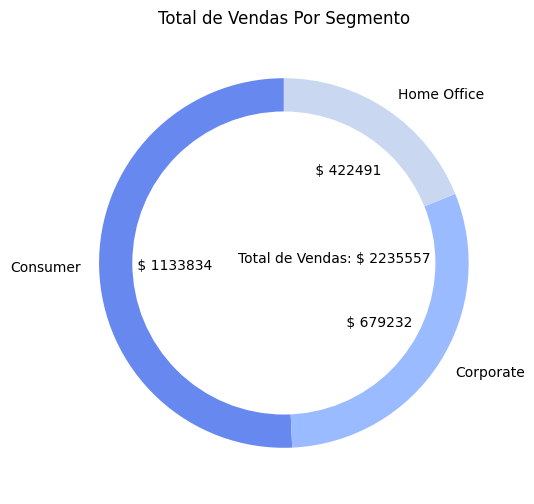

In [27]:
# Plot

# Tamanho da figura
plt.figure(figsize = (16, 6))

# Gráfico de pizza
plt.pie(df_dsaq5['Valor_Venda'], 
        labels = df_dsaq5['Segmento'],
        autopct = autopct_format(df_dsaq5['Valor_Venda']),
        startangle = 90)

# Limpa o círculo central
centre_circle = plt.Circle((0, 0), 0.82, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Labels e anotações
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(df_dsaq5['Valor_Venda']))), xy = (-0.25, 0))
plt.title('Total de Vendas Por Segmento')
plt.show()

## Pergunta de Negócio 6 (Desafio Nível Baby):

### Qual o Total de Vendas Por Segmento e Por Ano?

In [28]:
#Extrair o ano e criar uma coluna pra ele
# Split da coluna pelo caracter '/'
df_dsa['Data_Pedido'].str.split('/')

0       [08, 11, 2017]
1       [08, 11, 2017]
2       [12, 06, 2017]
3       [11, 10, 2016]
4       [11, 10, 2016]
             ...      
9695    [15, 12, 2018]
9696    [15, 12, 2018]
9697    [15, 12, 2018]
9698    [30, 10, 2017]
9699    [31, 07, 2018]
Name: Data_Pedido, Length: 9700, dtype: object

In [29]:

#Criando coluna para ano
df_dsa['Data_Pedido'].str.split('/').str[2]
df_dsa['Ano'] = df_dsa['Data_Pedido'].str.split('/').str[2]

In [30]:
# Aplicamos o group by
#dsa_df[['Segmento', 'Regiao', 'Valor_Venda']].groupby(['Segmento', 'Regiao']).mean()

df_dsaq6 = df_dsa.groupby(['Segmento', 'Ano'])['Valor_Venda'].sum()
df_dsaq6

Segmento     Ano 
Consumer     2015    256719.9166
             2016    265295.2593
             2017    288459.5572
             2018    323359.6019
Corporate    2015    125819.5957
             2016    114643.1229
             2017    203266.7398
             2018    235502.7284
Home Office  2015     88229.0878
             2016     74134.1332
             2017    103639.6270
             2018    156488.5849
Name: Valor_Venda, dtype: float64

## Pergunta de Negócio 7 (Desafio Nível Júnior):

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [31]:
len(df_dsa[(df_dsa.Valor_Venda > 1000)])

457

## Pergunta de Negócio 8 (Desafio Nível Master):

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [32]:

df_dsa['Desconto'] =  np.where(df_dsa['Valor_Venda'] > 1000, 0.15, 0.10)
df_dsa

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.8300,2018,0.1
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.3200,2018,0.1
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.7760,2018,0.1
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.6200,2017,0.1


In [33]:
df_dsa['Valor_Venda_Desconto'] = df_dsa['Valor_Venda'] - (df_dsa['Valor_Venda'] * df_dsa['Desconto'])

In [34]:
df_dsa_p8_vendas_antes_desconto = df_dsa.loc[df_dsa['Desconto'] == 0.15, 'Valor_Venda']
df_dsa_p8_vendas_depois_desconto = df_dsa.loc[df_dsa['Desconto'] == 0.15, 'Valor_Venda_Desconto']

media_vendas_antes_desconto = df_dsa_p8_vendas_antes_desconto.mean()
media_vendas_depois_desconto = df_dsa_p8_vendas_depois_desconto.mean()

In [35]:
print(media_vendas_antes_desconto)
print(media_vendas_depois_desconto)

2116.8078153172864
1799.2866430196952


## Pergunta de Negócio 9 (Desafio Nível Master Ninja):

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

In [36]:
#quebrar o mes
df_dsa['Data_Pedido'].str.split('/').str[1]
df_dsa['Mes'] = df_dsa['Data_Pedido'].str.split('/').str[1]


In [ ]:
df_dsa

In [ ]:
df_dsaq9 = df_dsa.groupby(['Segmento', 'Ano', 'Mes'])['Valor_Venda'].mean()
df_dsaq9

In [45]:
# Agrupamos por ano, mês e segmento e calculamos estatísticas de agregação [forma2]
df_dsaq9_2 = df_dsa.groupby(['Ano', 'Mes', 'Segmento'])['Valor_Venda'].agg([np.mean])
df_dsaq9_2

mean
Ano  Mes Segmento               
2015 01  Consumer     146.736787
         Corporate    130.886769
         Home Office  329.855882
     02  Consumer     117.327926
         Corporate     69.235333
...                          ...
2018 11  Corporate    341.215278
         Home Office  247.519423
     12  Consumer     183.616244
         Corporate    153.167403
         Home Office  224.523983

[144 rows x 1 columns]

In [46]:
anos = df_dsaq9.index.get_level_values(0)
meses = df_dsaq9.index.get_level_values(1)
segmentos = df_dsaq9.index.get_level_values(2)

<Figure size 1200x600 with 0 Axes>

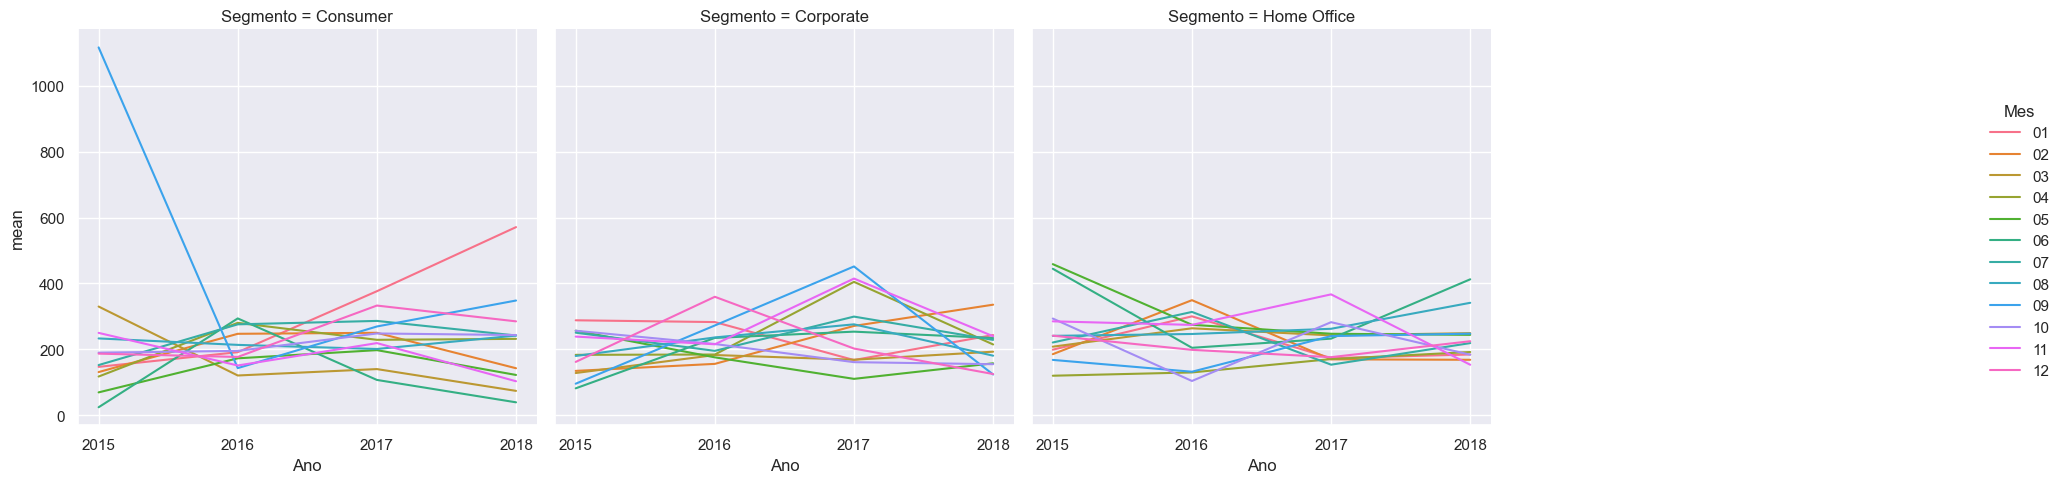

In [47]:
plt.figure(figsize = (12, 6))
sns.set()
fig1 = sns.relplot(kind = 'line',
                   data = df_dsaq9_2, 
                   y = 'mean', 
                   x = meses,
                   hue = segmentos, 
                   col = anos,
                   col_wrap = 4)
plt.show()

## Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

In [52]:
df_dsaq10 = df_dsa.groupby(['Categoria', 'SubCategoria'])['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda', ascending= False).head(12)
df_dsaq10



,Categoria,SubCategoria,Valor_Venda
16,Technology,Phones,325271.2940
1,Furniture,Chairs,317919.6250
11,Office Supplies,Storage,216188.3620
3,Furniture,Tables,202083.3600
6,Office Supplies,Binders,194723.3810
15,Technology,Machines,189238.6310
13,Technology,Accessories,162791.3620
14,Technology,Copiers,146248.0940
0,Furniture,Bookcases,108045.0467
4,Office Supplies,Appliances,104061.6930


In [ ]:
plt.figure(figsize = (16, 6))
sns.set_palette('coolwarm')
sns.barplot(data = df_dsaq4, 
            y = 'Valor_Venda', 
            x = 'Cidade').set(title = 'As 10 Cidades com Maior Total de Vendas')
plt.show()

# Fim